# Prophet 

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.metrics import r2_score


## 데이터
- 위키피디어 로그 데이터

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
print(df.shape)
df.head()

(2905, 2)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
print(df.shape)

(2905, 2)


## 모델 구성 및 학습

In [5]:
df.ds = pd.to_datetime(df.ds)
# df.ds = df.ds.apply(pd.to_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


- 예측하고 싶은 미래 날짜를 자동으로 생성
- 기간을 인자로 입력

In [7]:
m = Prophet()
m.fit(df)
# forecast = m.predict(future_test)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# 향 후 1년 예측
future = m.make_future_dataframe(periods=365)
print(future.shape)
future.tail()

(3270, 1)


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


- 예측은 predict 함수로 수행
- future에 있는 모든 날짜의 예측치를 추정하여 yhat 컬럼에 담는다
- 결과 forecast 객체에는 이외에도 여러가지 값들이 저장된다 (최대, 최소 범위 등)

In [9]:
forecast = m.predict(future)
print(forecast.shape)
forecast[:2]

(3270, 19)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.042185,8.250554,9.435239,8.042185,8.042185,0.803095,0.803095,0.803095,0.352287,0.352287,0.352287,0.450808,0.450808,0.450808,0.0,0.0,0.0,8.845280
1,2007-12-11,8.040639,7.938898,9.221811,8.040639,8.040639,0.553177,0.553177,0.553177,0.119643,0.119643,0.119643,0.433535,0.433535,0.433535,0.0,0.0,0.0,8.593816


### 결과 그래프
- Prophet.plot 함수 사용

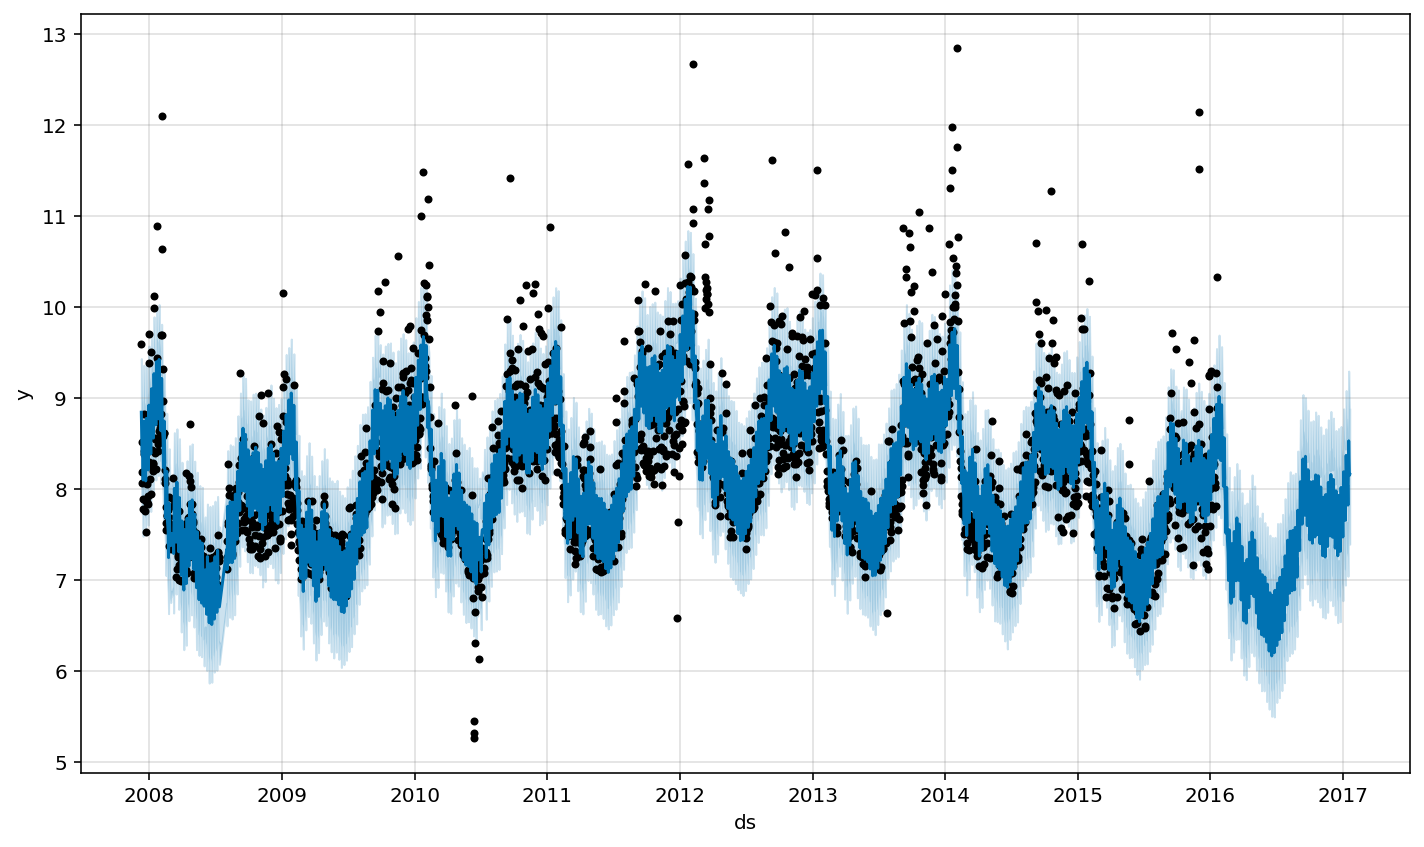

In [10]:
fig1 = m.plot(forecast)
from datetime import datetime
import matplotlib.pyplot as plt
# plt.xlim([datetime(2015, 8, 1), datetime(2016, 5, 1)])
plt.show()

In [11]:
# 과제: 과거 1년간 데이터 (예:2015년)를 그 이전의 데이터로 예측하는 모델을 만든다. 예: train_df = df[:-365], test_df = df[-365:]
# predict()를 수행할 때는 예측할 기간(future) 데이터프레임의 y 값 컬럼은 삭제해야 한다 (예측하고 싶은 날짜 정보만 주어야 한다)
# 지난 1년치 예측의 r2_score(y_test, y_pred)를 구해보자. (MAE?) - show_regression_result() 이용

In [12]:
df.shape

(2905, 2)

In [13]:
train_df = df[:-365]
test_df = df[-365:]

In [14]:
full_range = df.copy()
full_range = full_range.drop(["y"], axis=1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


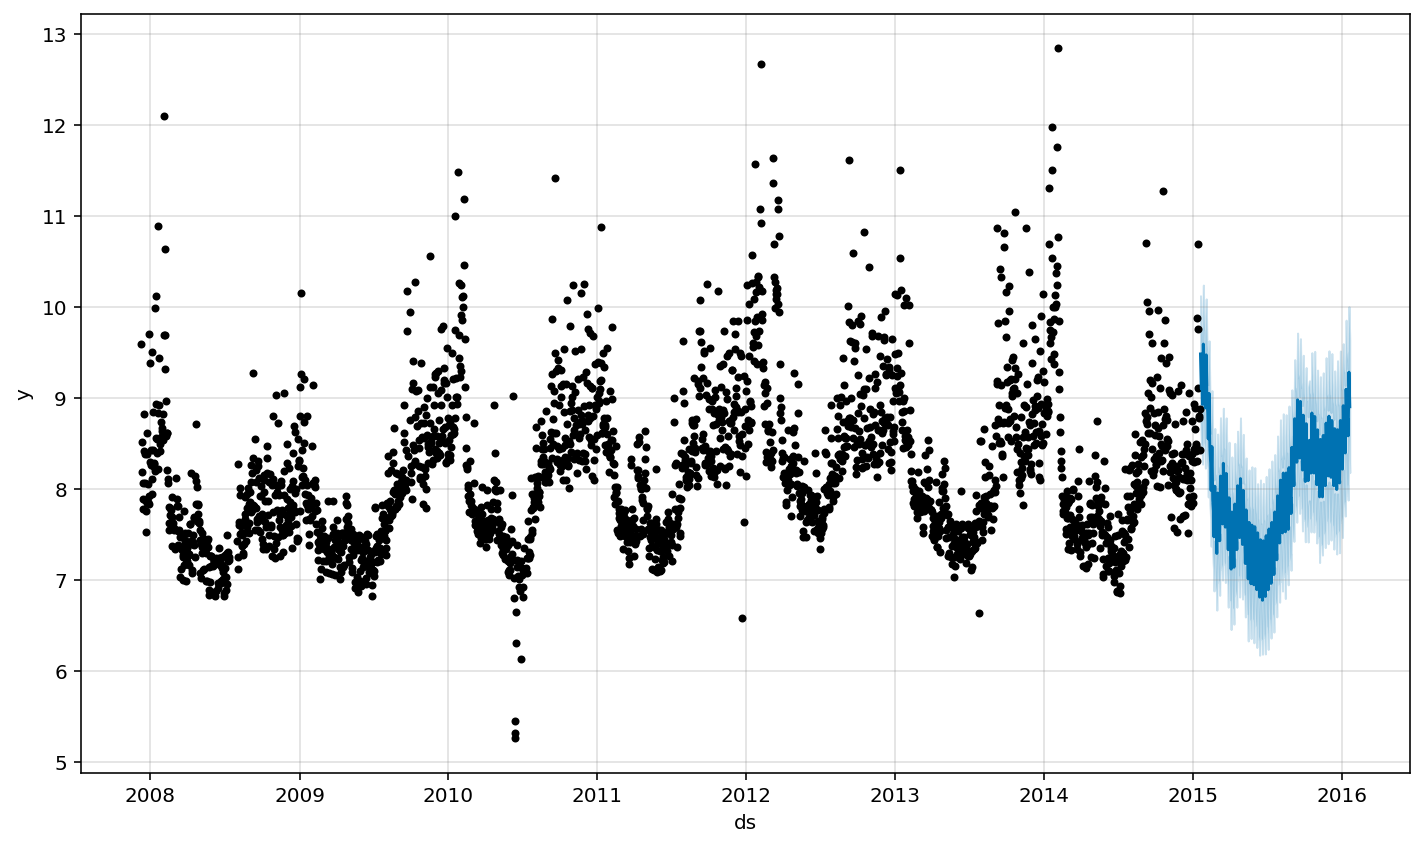

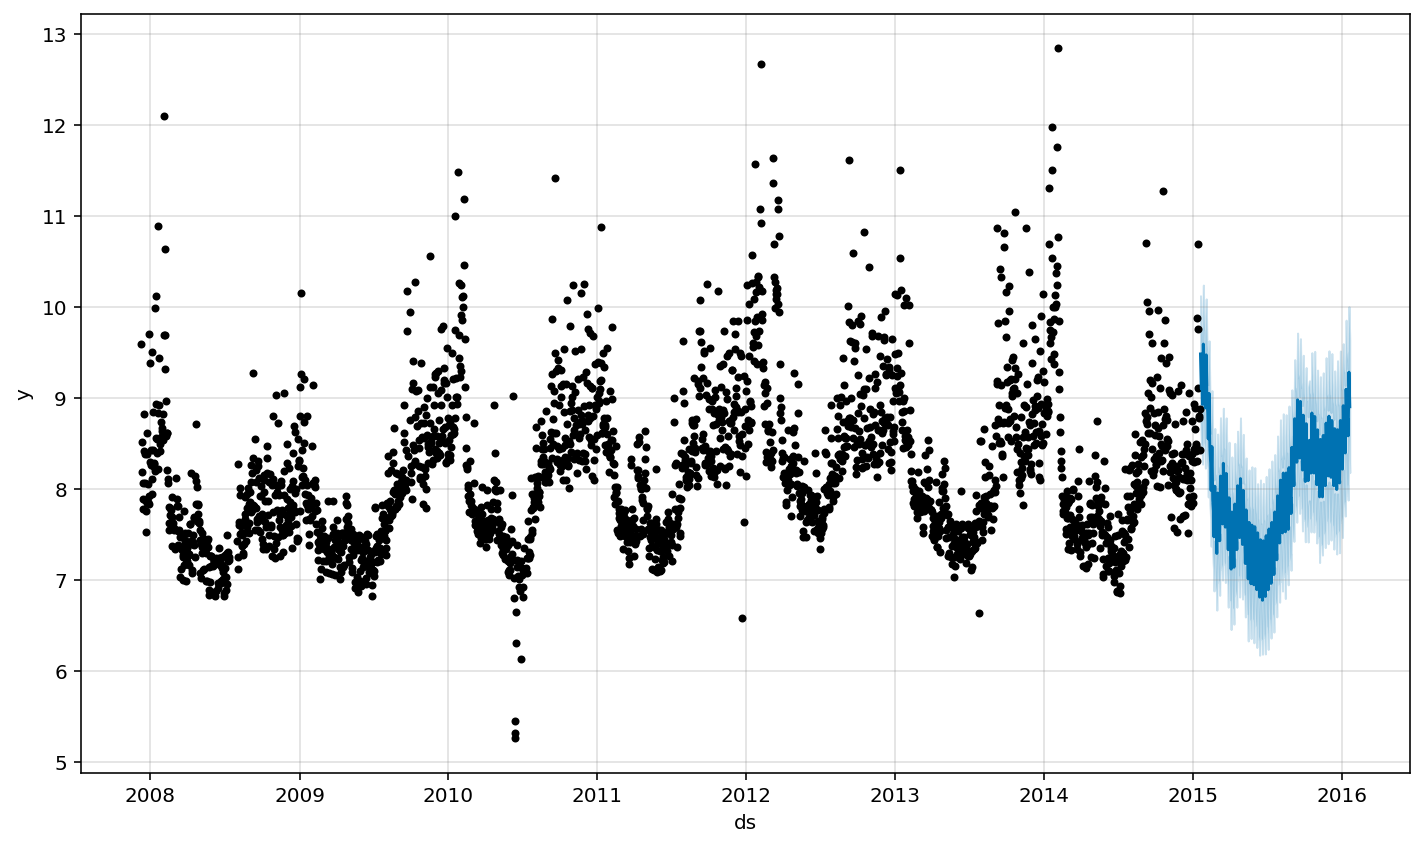

In [15]:
future_test = test_df.drop(["y"], axis=1) # 최근 1년치만 예측 관찰

m= Prophet()
m.fit(train_df)
forecast = m.predict(future_test)
# print(forecast.shape)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast)

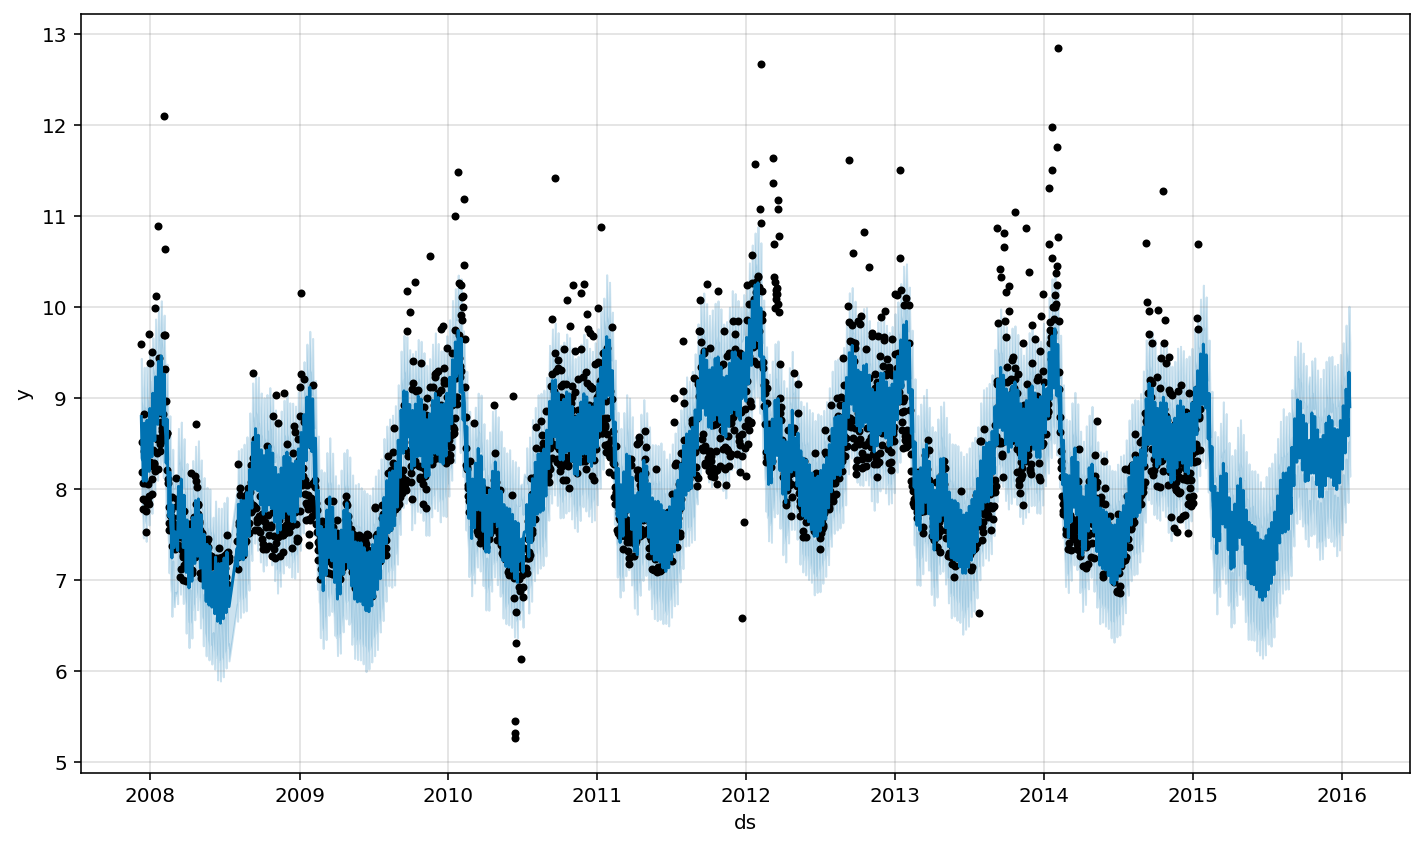

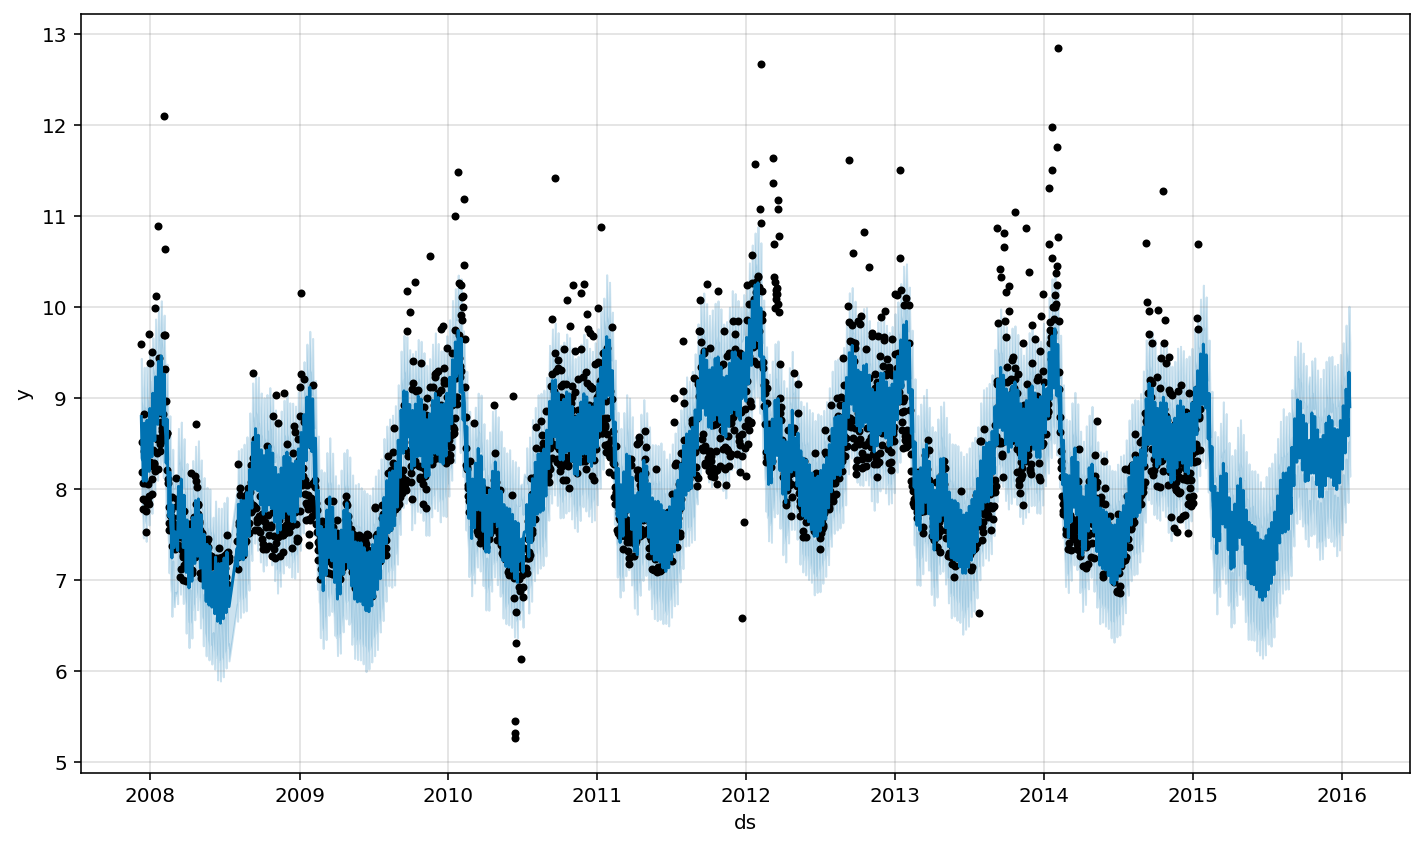

In [16]:
forecast_full = m.predict(full_range)
# print(forecast.shape)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast_full)

In [17]:
y_test = test_df.y
y_pred = forecast.yhat

In [18]:
def show_regression_result(y_test, y_pred, N=150):
    plt.rc('figure', figsize=(6,4))
    error = y_pred - y_test
    print("MAE=", np.abs(error).mean().round(4))
    print("max error=", max(error).round(4))
    #  잔차  (residue) 산포도
    print("R2=",r2_score(y_test, y_pred).round(4)) # R2
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.show()
    plt.scatter(y_test, error, s=5)
    plt.xlabel('y_test')
    plt.ylabel('error')
    plt.show()

MAE= 0.4157
max error= 1.2354
R2= 0.4462


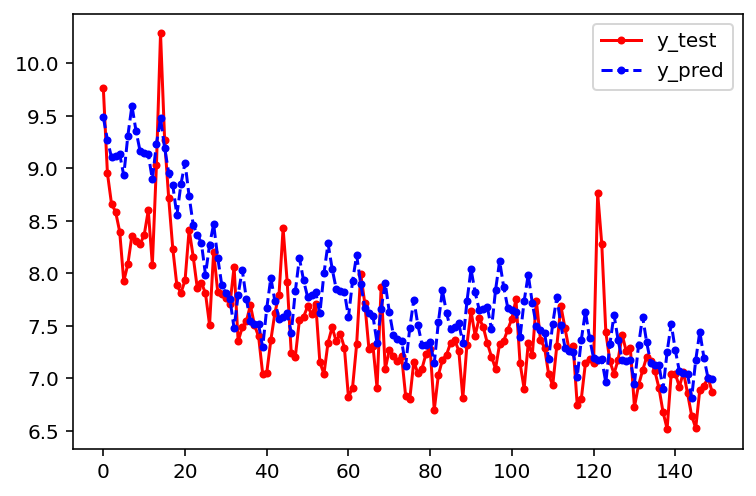

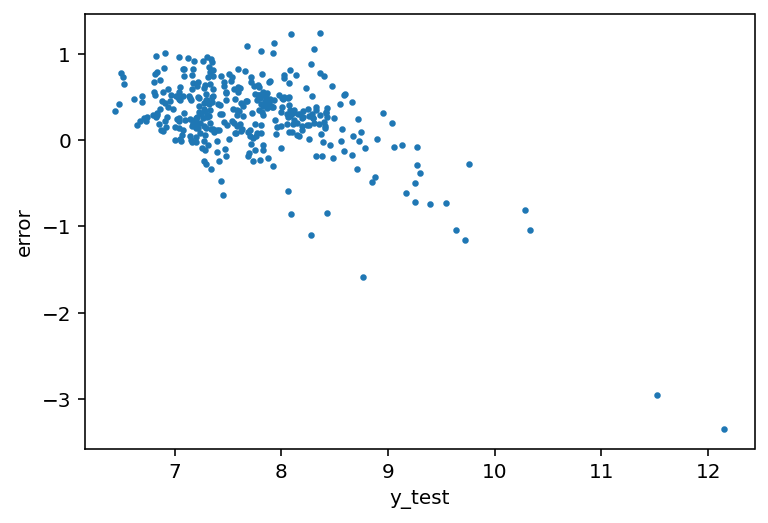

In [19]:
show_regression_result(y_test.values, y_pred.values) # 중요: 데이터프레임이나 시리즈의 내용(값)만 어레이로 바꾸려면 .values 사용

- 컴포넌트를 보려면 `Prophet.plot_components` 함수 사용
- 트렌드, 계절성, 휴일정보 등

In [20]:
# 최근 1년의 동향 뿐 아니라, 학습기간 (9년)의 동향도 모두 같이 보려면 future 변수에 전 기간을 사용하면 된다

In [21]:
forecast.shape

(365, 19)

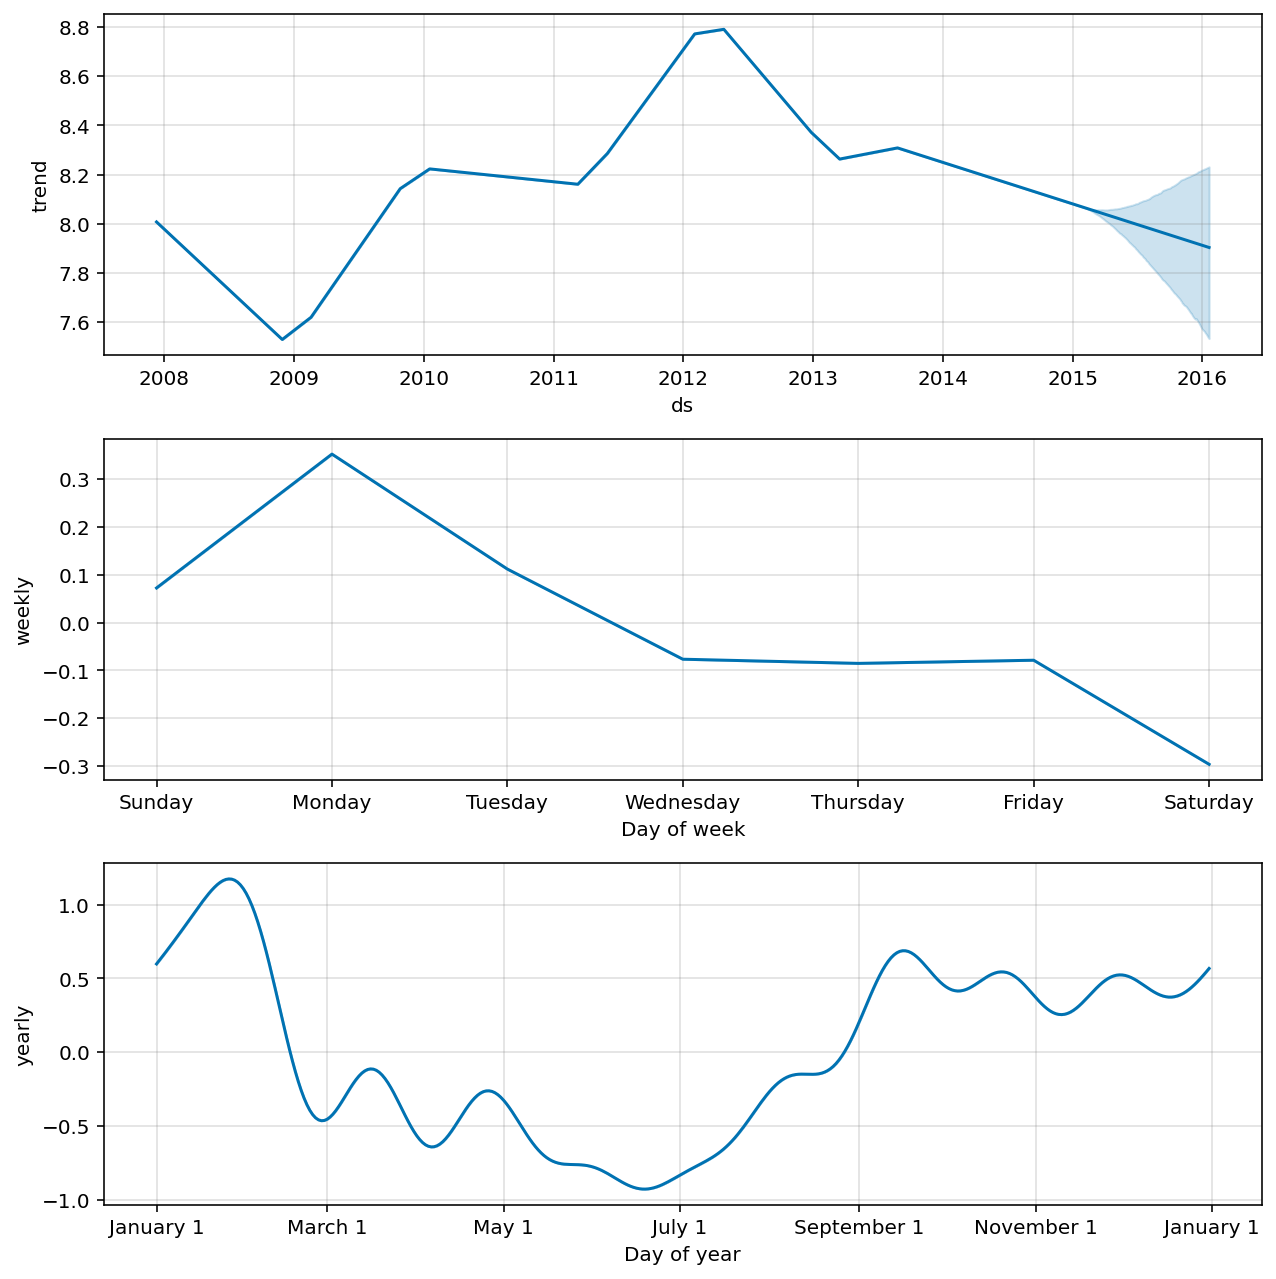

In [22]:
fig2 = m.plot_components(forecast_full)

## 적은 데이터 예측

In [23]:
path = 'https://raw.githubusercontent.com/StillWork/data/master/car_sales.csv'
df = pd.read_csv(path)
print(df.shape)

(108, 2)


In [24]:
df[:3]

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


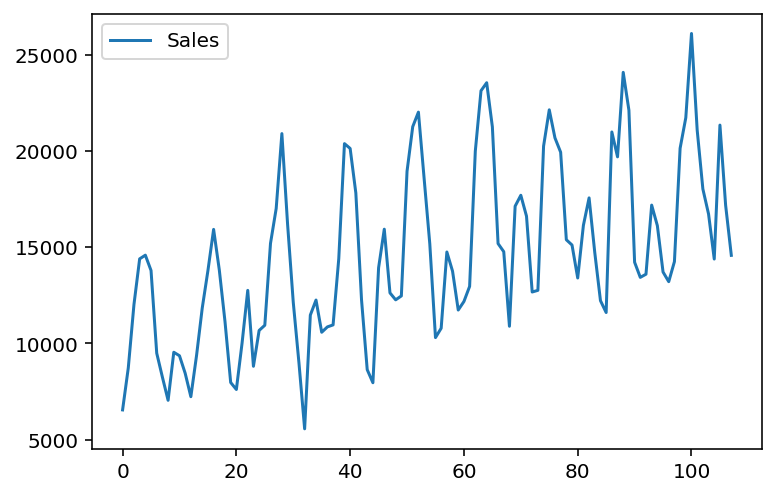

In [26]:
df.plot()
plt.show()

In [27]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [28]:
df[:3]

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026


## 학습

In [29]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
df['ds'].min(), df['ds'].max(), 

(Timestamp('1960-01-01 00:00:00'), Timestamp('1968-12-01 00:00:00'))

## 향후 1년간 예측

In [31]:
future = model.make_future_dataframe(periods=12, freq='MS')
future

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
...,...
115,1969-08-01
116,1969-09-01
117,1969-10-01
118,1969-11-01


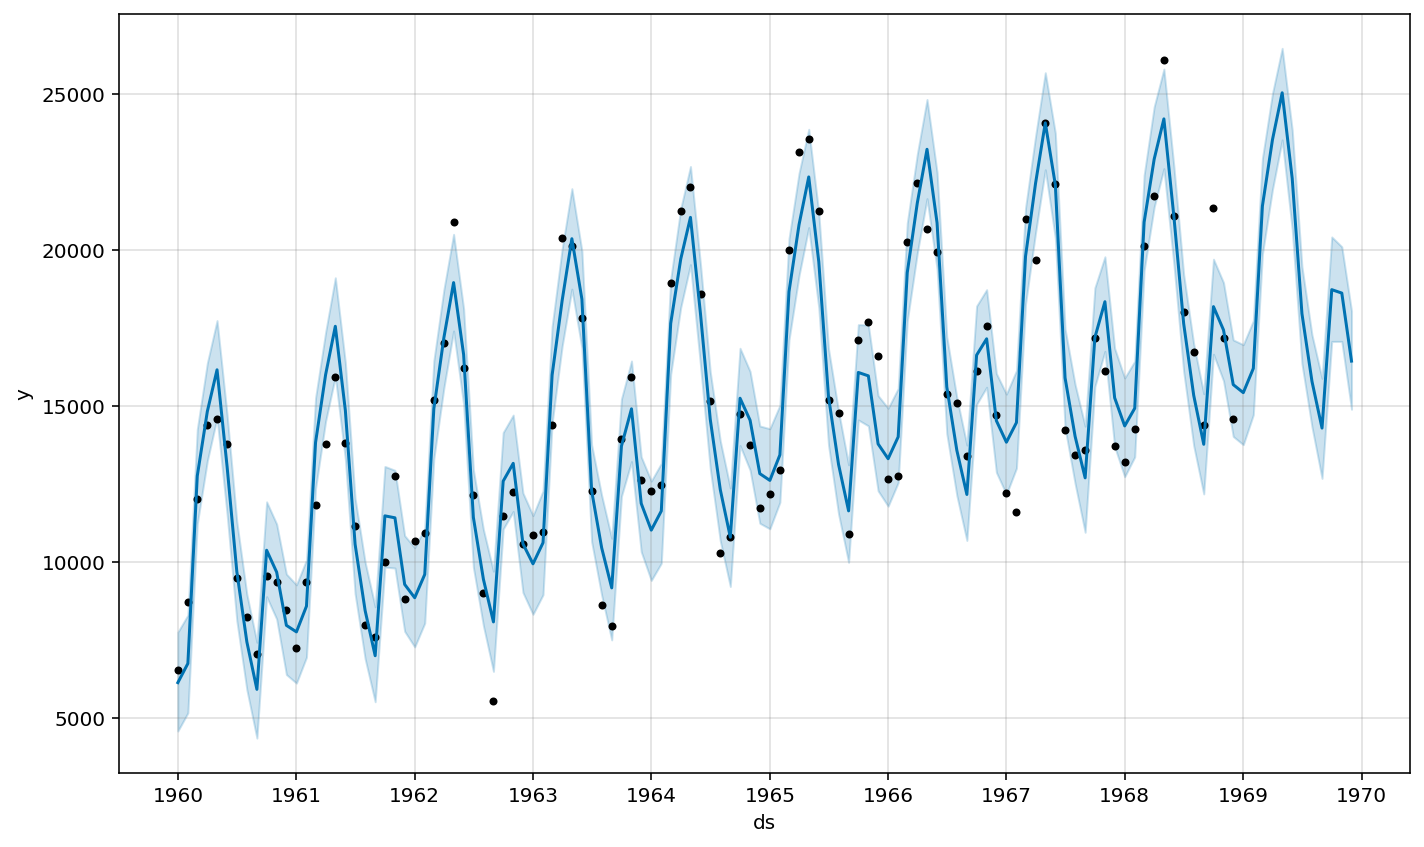

In [32]:
forecast = model.predict(future)
model.plot(forecast)
plt.show()

## 훈련과 검증
- 최종 1년 데이터를 test 데이터로 사용

In [34]:
train = df[:-12]
test = df[-12:]

In [35]:
future = test.drop("y", axis=1) 
future

,ds
96,1968-01-01
97,1968-02-01
98,1968-03-01
99,1968-04-01
100,1968-05-01
101,1968-06-01
102,1968-07-01
103,1968-08-01
104,1968-09-01
105,1968-10-01


In [36]:
model = Prophet()
model.fit(train)

forecast = model.predict(future)
y_pred = forecast['yhat'].values
y_test = test['y'].values

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


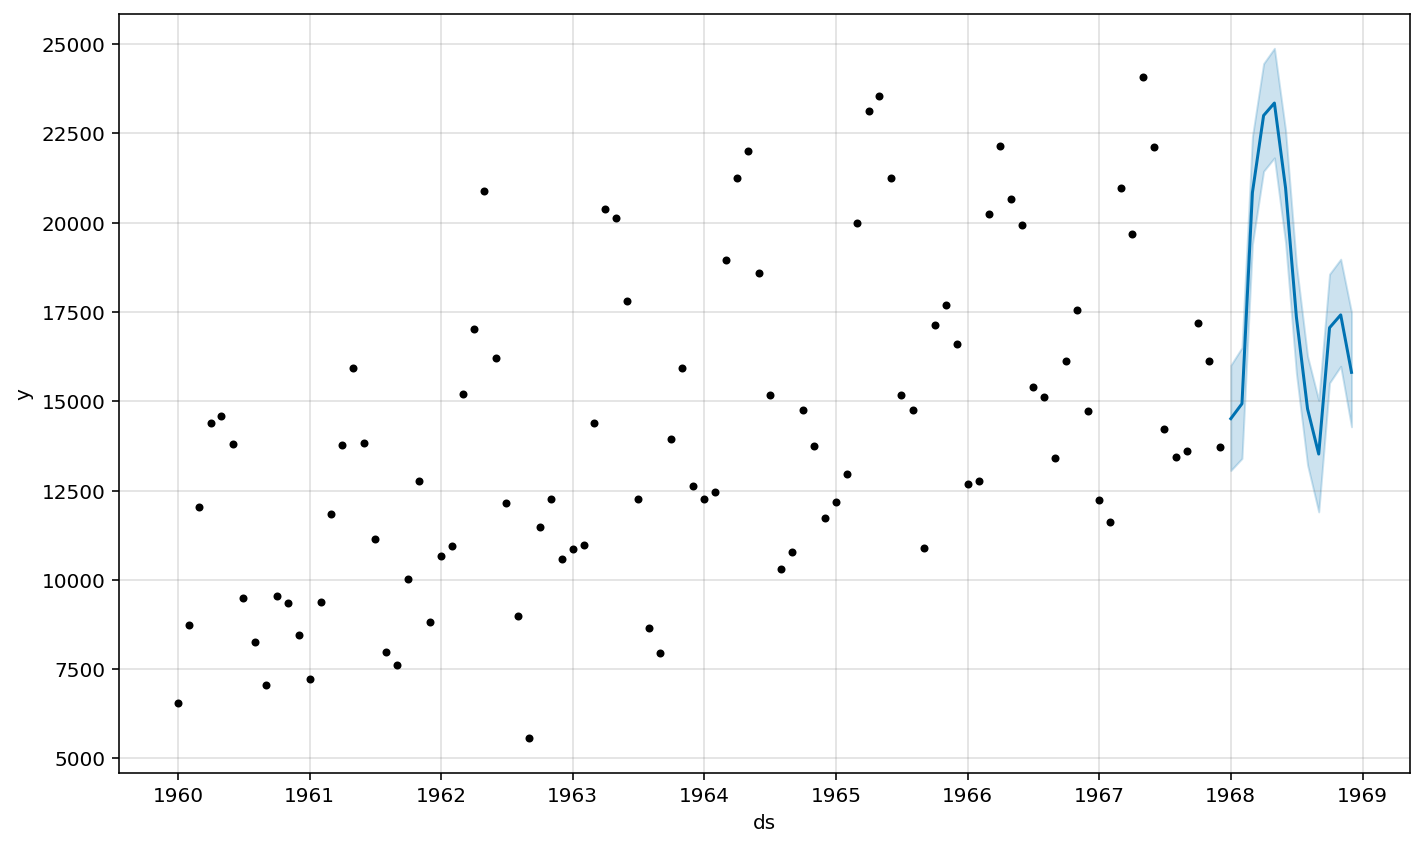

In [37]:
model.plot(forecast); plt.show()

MAE= 1336.8138
max error= 1302.9932
R2= 0.7817


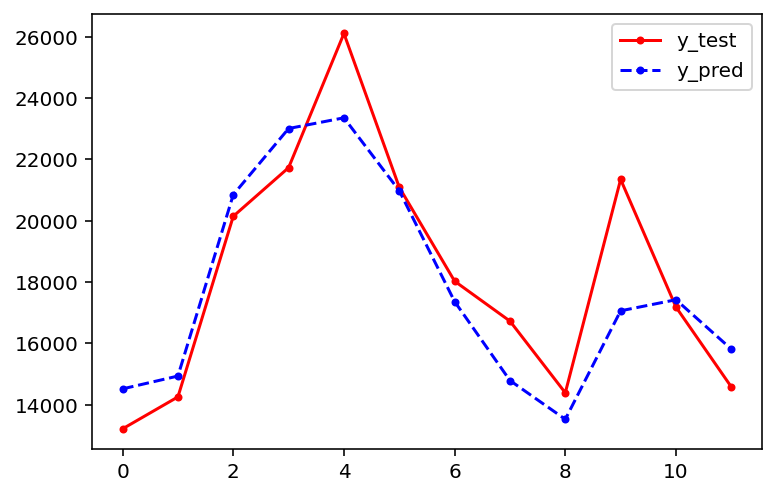

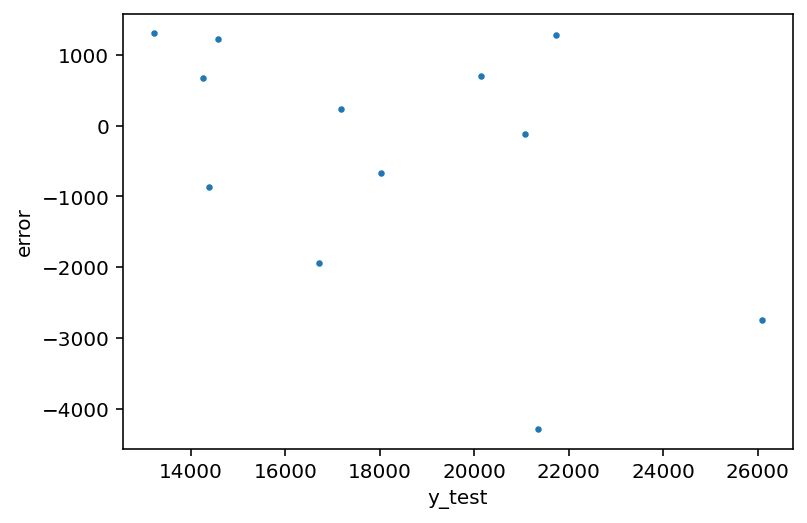

In [38]:
show_regression_result(y_test, y_pred, 100)

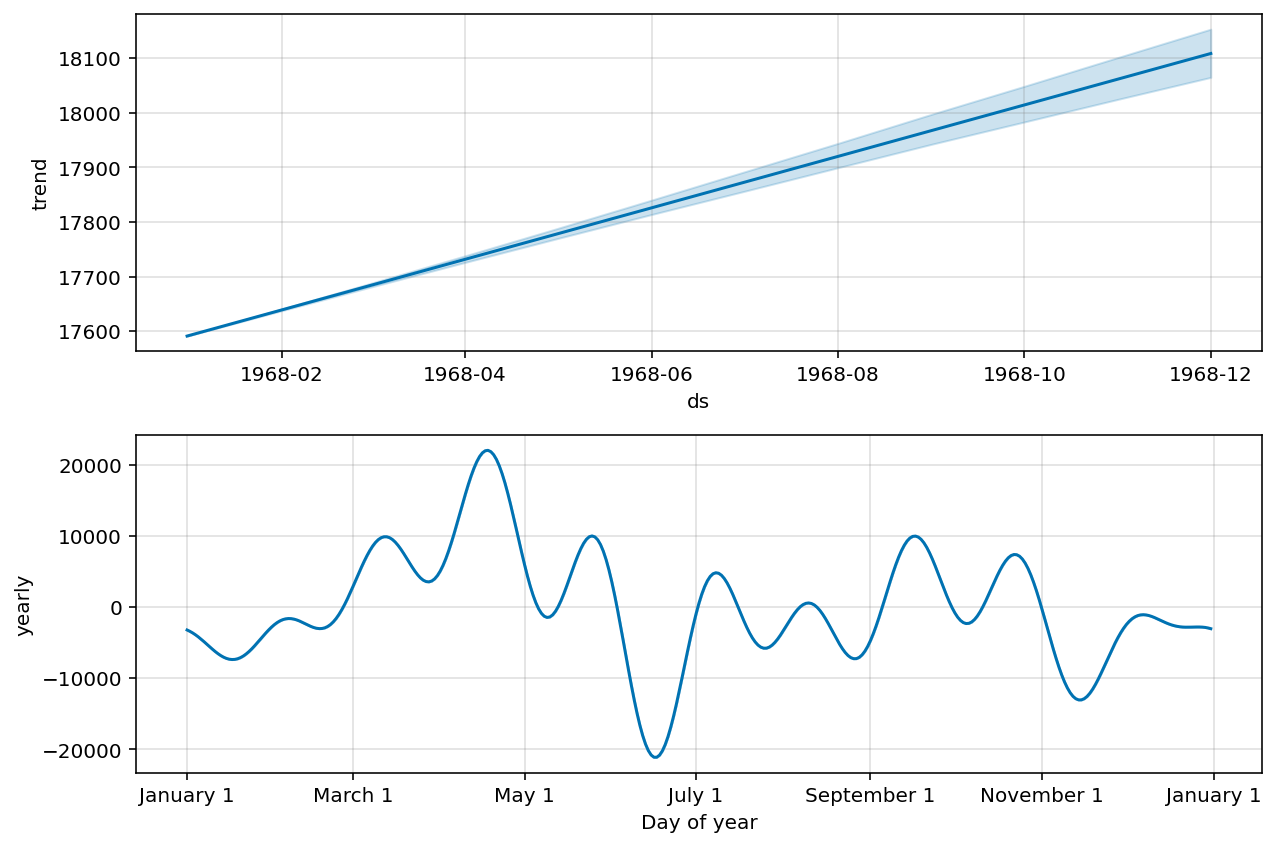

In [39]:
fig2 = model.plot_components(forecast)

In [40]:
# 과제: 위에서는 과거 1년 데이터를 예측하는 것을 검증했다. (9년치: 8년치 학습, 1년치로 검증)
# 과거 2년치를 예측하는 모델로 바꾸어 본다 (7년치로 학습, 2년치로 검증)

# 선형 또는 naive 모델

In [41]:
def naive_model(x_seq):
    return np.array(x_seq).mean(axis=1)

In [42]:
def split_seq(sequence, n_steps):
    x, y = [], []
    for i in range(len(sequence)):
        if i > len(sequence) - n_steps - 1 : break
        x.append(sequence[i:i+n_steps])
        y.append(sequence[i+n_steps])
    return np.array(x), np.array(y)

In [43]:
def split_seq_2(sequence, n_steps_in, n_steps_out=1):
  x, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [44]:
from sklearn.linear_model import LinearRegression
y = df.y.values
cut = np.int((len(y)*0.89))
train = y[:cut]
test = y[cut:]
y.shape, train.shape, test.shape, cut

((108,), (96,), (12,), 96)

In [45]:
lr= LinearRegression()
for n_steps in range(1,10):
  x_train, y_train = split_seq(train, n_steps)
  x_test, y_test = split_seq(test, n_steps)
  lr.fit(x_train, y_train) 
  print(n_steps, lr.score(x_test, y_test).round(3))

1 -0.067
2 -0.385
3 -0.109
4 -0.07
5 -0.464
6 -0.427
7 -0.462
8 -0.411
9 -0.635


MAE= 3484.0909
max error= 5015.0
R2= -0.2192


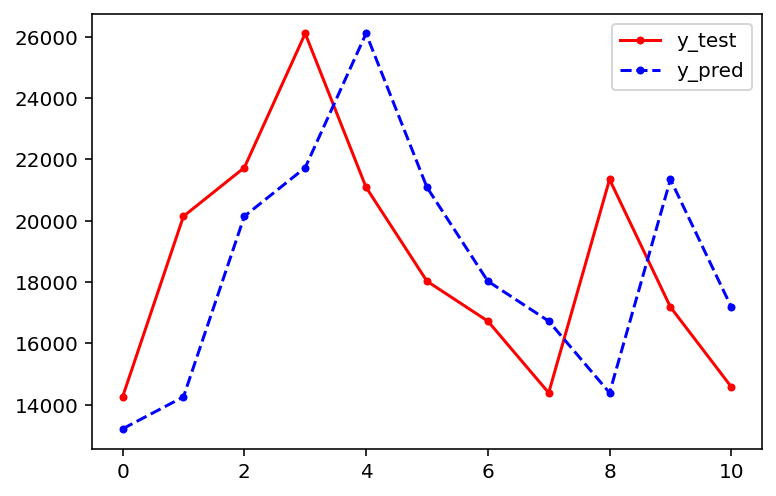

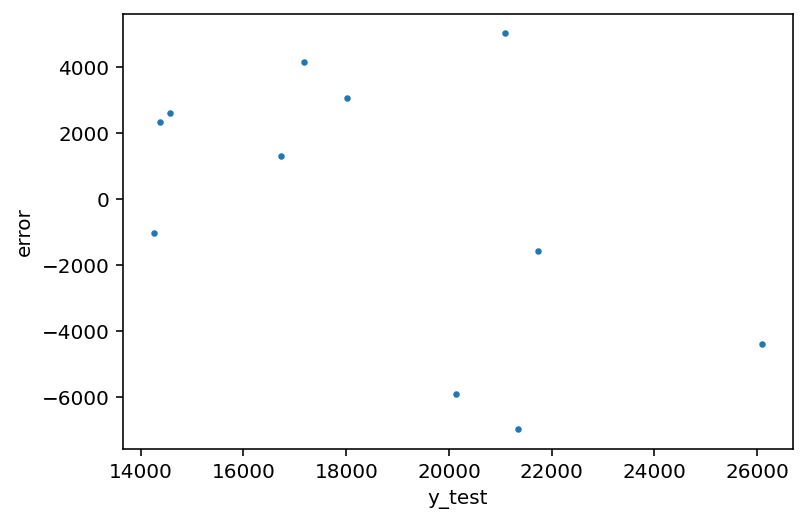

In [46]:
n_steps_in = 1
n_steps_out = 1
x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
# lr.fit(x_train, y_train) 
y_pred = naive_model(x_test)
show_regression_result(y_test, y_pred)